# Reprezentacja liczb zmienno przecinkowych
## Laboratorium 1 - rozwiązanie


### Zadanie 1
Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [2]:
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode (generic function with 3 methods)

In [3]:
a16 = Float16(1/3)
a32 = Float32(1/3)
a64 = Float64(1/3)

b16 = Float16(1/3)
b64 = Float64(b16)

0.333251953125

In [4]:
println("16 bit: ", decode(a16))
println("32 bit: ", decode(a32))
println("64 bit: ", decode(a64))
println("64 bit from 16 bit", decode(b64))

16 bit: ('0', "01101", "0101010101")
32 bit: ('0', "01111101", "01010101010101010101011")
64 bit: ('0', "01111111101", "0101010101010101010101010101010101010101010101010101")
64 bit from 16 bit('0', "01111111101", "0101010101000000000000000000000000000000000000000000")


Jak widać liczba 1/3 ma nieskończone rozwinięcie binarne, więc większa liczba bitów w mantysie pozwala uzyskać lepsze przybliżenie rzeczywistej wartości.

Warto zauważyć, że 32 bitowa reprezentacja liczby została zaokrąglona (ostatni bit mantysy to 1). Dzięki zaokrąglaniu uzyskujemy przybliżenie nawet dwukrotnie bliższe niż w przypadku obcięcia ostatniej cyfry.

Na koniec zaobserwujmy, że liczba 64 bitowa uzyskana z 16 bitowej reprezentacji została znormalizowana, więc cecha jest identyczna z 16 bitowym (1/3), jednak "nieznane" bity mantysy zostały zastąpione zerami.

### Zadanie 2

Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

In [4]:
using Plots

x = Float16[]
y = Float16[]
a = Float16(1.0)
while a <= 1000000.0
    push!(x, a)
    push!(y, nextfloat(a)-a)
    a = nextfloat(a)
end
    

In [5]:
scatter(x, y)

In [6]:
x = Float32[]
y = Float32[]
for i = 1:100:1000000 #step = 100, ponieważ dokładniejsze reprezentacje były zbyt liczne i wykres nie mógł się u mnie utworzyć
    a = Float32(i)
    push!(x, a)
    push!(y, nextfloat(a)-a)
end

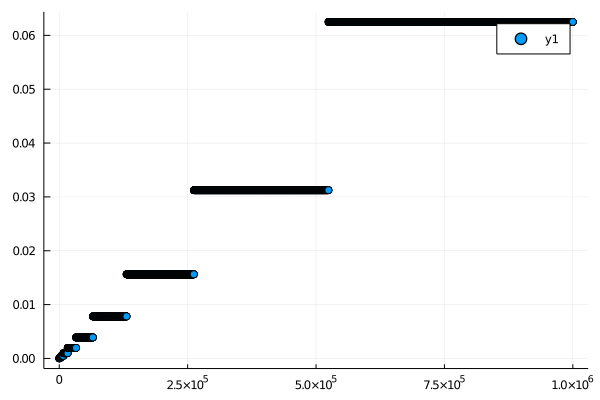

In [7]:
scatter(x, y)

Wyniki pokazują, że wykres odległości między dwoma liczbami ma charakter skokowy. Jest to spowodowane tym, jaką najmniejszą wartość ma LSB mantysy (np. dla najwyższej cechy w reprezentacji 16-bitowej wynosi on (1/2)*2^(|wart. cechy| - |dł. mantysy|) = 32)

### Zadanie 3
Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

```c
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main(){
  float a = 4.2;
  while (a > 0){
    gsl_ieee_printf_float(&a); printf("\n");
    a /= 2.0;
  }
  gsl_ieee_printf_float(&a); printf("\n"); //we make sure `a` is zero
  return 0;
}


```

 ```c
 1.00001100110011001100110*2^2
 1.00001100110011001100110*2^1
 1.00001100110011001100110*2^0
 1.00001100110011001100110*2^-1
 1.00001100110011001100110*2^-2
 1.00001100110011001100110*2^-3
 1.00001100110011001100110*2^-4
 1.00001100110011001100110*2^-5
 1.00001100110011001100110*2^-6
 1.00001100110011001100110*2^-7
 1.00001100110011001100110*2^-8
 1.00001100110011001100110*2^-9
 1.00001100110011001100110*2^-10
 1.00001100110011001100110*2^-11
 1.00001100110011001100110*2^-12
 1.00001100110011001100110*2^-13
 1.00001100110011001100110*2^-14
 1.00001100110011001100110*2^-15
 1.00001100110011001100110*2^-16
 1.00001100110011001100110*2^-17
 1.00001100110011001100110*2^-18
 1.00001100110011001100110*2^-19
 1.00001100110011001100110*2^-20
 1.00001100110011001100110*2^-21
 1.00001100110011001100110*2^-22
 1.00001100110011001100110*2^-23
 1.00001100110011001100110*2^-24
 1.00001100110011001100110*2^-25
 1.00001100110011001100110*2^-26
 1.00001100110011001100110*2^-27
 1.00001100110011001100110*2^-28
 1.00001100110011001100110*2^-29
 1.00001100110011001100110*2^-30
 1.00001100110011001100110*2^-31
 1.00001100110011001100110*2^-32
 1.00001100110011001100110*2^-33
 1.00001100110011001100110*2^-34
 1.00001100110011001100110*2^-35
 1.00001100110011001100110*2^-36
 1.00001100110011001100110*2^-37
 1.00001100110011001100110*2^-38
 1.00001100110011001100110*2^-39
 1.00001100110011001100110*2^-40
 1.00001100110011001100110*2^-41
 1.00001100110011001100110*2^-42
 1.00001100110011001100110*2^-43
 1.00001100110011001100110*2^-44
 1.00001100110011001100110*2^-45
 1.00001100110011001100110*2^-46
 1.00001100110011001100110*2^-47
 1.00001100110011001100110*2^-48
 1.00001100110011001100110*2^-49
 1.00001100110011001100110*2^-50
 1.00001100110011001100110*2^-51
 1.00001100110011001100110*2^-52
 1.00001100110011001100110*2^-53
 1.00001100110011001100110*2^-54
 1.00001100110011001100110*2^-55
 1.00001100110011001100110*2^-56
 1.00001100110011001100110*2^-57
 1.00001100110011001100110*2^-58
 1.00001100110011001100110*2^-59
 1.00001100110011001100110*2^-60
 1.00001100110011001100110*2^-61
 1.00001100110011001100110*2^-62
 1.00001100110011001100110*2^-63
 1.00001100110011001100110*2^-64
 1.00001100110011001100110*2^-65
 1.00001100110011001100110*2^-66
 1.00001100110011001100110*2^-67
 1.00001100110011001100110*2^-68
 1.00001100110011001100110*2^-69
 1.00001100110011001100110*2^-70
 1.00001100110011001100110*2^-71
 1.00001100110011001100110*2^-72
 1.00001100110011001100110*2^-73
 1.00001100110011001100110*2^-74
 1.00001100110011001100110*2^-75
 1.00001100110011001100110*2^-76
 1.00001100110011001100110*2^-77
 1.00001100110011001100110*2^-78
 1.00001100110011001100110*2^-79
 1.00001100110011001100110*2^-80
 1.00001100110011001100110*2^-81
 1.00001100110011001100110*2^-82
 1.00001100110011001100110*2^-83
 1.00001100110011001100110*2^-84
 1.00001100110011001100110*2^-85
 1.00001100110011001100110*2^-86
 1.00001100110011001100110*2^-87
 1.00001100110011001100110*2^-88
 1.00001100110011001100110*2^-89
 1.00001100110011001100110*2^-90
 1.00001100110011001100110*2^-91
 1.00001100110011001100110*2^-92
 1.00001100110011001100110*2^-93
 1.00001100110011001100110*2^-94
 1.00001100110011001100110*2^-95
 1.00001100110011001100110*2^-96
 1.00001100110011001100110*2^-97
 1.00001100110011001100110*2^-98
 1.00001100110011001100110*2^-99
 1.00001100110011001100110*2^-100
 1.00001100110011001100110*2^-101
 1.00001100110011001100110*2^-102
 1.00001100110011001100110*2^-103
 1.00001100110011001100110*2^-104
 1.00001100110011001100110*2^-105
 1.00001100110011001100110*2^-106
 1.00001100110011001100110*2^-107
 1.00001100110011001100110*2^-108
 1.00001100110011001100110*2^-109
 1.00001100110011001100110*2^-110
 1.00001100110011001100110*2^-111
 1.00001100110011001100110*2^-112
 1.00001100110011001100110*2^-113
 1.00001100110011001100110*2^-114
 1.00001100110011001100110*2^-115
 1.00001100110011001100110*2^-116
 1.00001100110011001100110*2^-117
 1.00001100110011001100110*2^-118
 1.00001100110011001100110*2^-119
 1.00001100110011001100110*2^-120
 1.00001100110011001100110*2^-121
 1.00001100110011001100110*2^-122
 1.00001100110011001100110*2^-123
 1.00001100110011001100110*2^-124
 1.00001100110011001100110*2^-125
 1.00001100110011001100110*2^-126
 0.10000110011001100110011*2^-126
 0.01000011001100110011010*2^-126
 0.00100001100110011001101*2^-126
 0.00010000110011001100110*2^-126
 0.00001000011001100110011*2^-126
 0.00000100001100110011010*2^-126
 0.00000010000110011001101*2^-126
 0.00000001000011001100110*2^-126
 0.00000000100001100110011*2^-126
 0.00000000010000110011010*2^-126
 0.00000000001000011001101*2^-126
 0.00000000000100001100110*2^-126
 0.00000000000010000110011*2^-126
 0.00000000000001000011010*2^-126
 0.00000000000000100001101*2^-126
 0.00000000000000010000110*2^-126
 0.00000000000000001000011*2^-126
 0.00000000000000000100010*2^-126
 0.00000000000000000010001*2^-126
 0.00000000000000000001000*2^-126
 0.00000000000000000000100*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0
```

Powyższy przykład pokazuje, że przy dzieleniu przez 2 liczby typu float, w większości przypadków zmienia się jej cecha, jednak nie mantysa. Dokładność nie jest tracona dzięki tzw. *bitom chroniącym* - komputer wykonuje niektóre działania na nieco większych reprezentacjach liczb, a następnie je zaokrągla (na podstawie "Analiza Numeryczna" D. Kingsley, W. Cheney, str. 42)

Powyższe stwierdzenie nie jest prawdziwe, gdy zbliżamy się "niebezpiecznie blisko" zera. Kiedy cecha przyjmuje wartość 0 (w wykładniku zostaje sam bias), to wykonuje się działania na samej mantysy, tracąc tym samym dokładność reprezentacji (możemy zapisywać coraz to mniej cyfr znaczących) W pewnym momencie mamy do czynienia z niedomiarem i komputer uznaje liczbę `a` za 0.

Analogiczna sytuacja miałaby miejsce dla liczb podwójnej precyzji, lecz reprezentacje bitowe byłyby dłuższe.

### Zadanie 4
Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

#### Ad. 1
Przyjrzyjmy się ciągowi danemu równaniem rekurencyjnym:

$$  x_{0} = 1, x_{1} = \frac{1}{3}, x_{n+1} = \frac{13}{3}x_{n} - \frac{4}{3}x_{n-1}   (n \geq 1)$$

Można udowodnić indukcyjnie, że ciąg jest malejący. Spróbujmy zatem obliczyć kolejne wyrazy ciągu:

In [12]:
A = Float32(13/3)  #stałe
B = Float32(-4/3)

tmp1 = Float32(1.0)  #kolejne wyrazy
tmp2 = Float32(1/3)
for i = 2:19
    tmp3 = A*tmp2 + B*tmp1
    println("x", i, " = ", tmp3)
    tmp1 = tmp2
    tmp2 = tmp3
end

x2 = 0.111111164
x3 = 0.037037253
x4 = 0.012346551
x5 = 0.0041187145
x6 = 0.0013856944
x7 = 0.0005130563
x8 = 0.0003756514
x9 = 0.0009437478
x10 = 0.0035887053
x11 = 0.014292726
x12 = 0.057150207
x13 = 0.22859395
x14 = 0.9143735
x15 = 3.6574934
x16 = 14.629973
x17 = 58.519894
x18 = 234.07957
x19 = 936.3183


Wynik jest zaskakujący! Malejący ciąg zaczął rosnąć. 

#### Ad. 2
Problemem jest tutaj fakt, że początkowy błąd reprezentacji liczby 1/3 jest przenoszony i mnożony przez 13/3 z każdą kolejną iteracją
Błąd jest kumulowany i dla 14-tego wyrazu wynosi już (13/3)^14

#### Ad. 3
Stabilne jest natomiast obliczenie rekurencji w postaci jawnej. Indukcyjnie można udowodnić, że n-ty wyraz ciągu ma postać
$$ x_{n} = (\frac{1}{3})^{n} $$

In [14]:
tmp = Float32(1/3)
for i = 2:19
    tmp *= 1/3
    println("x", i, " = ", tmp)
end

x2 = 0.11111111442248026
x3 = 0.03703703814082675
x4 = 0.012345679380275582
x5 = 0.00411522646009186
x6 = 0.0013717421533639533
x7 = 0.0004572473844546511
x8 = 0.00015241579481821703
x9 = 5.080526493940567e-5
x10 = 1.6935088313135223e-5
x11 = 5.645029437711741e-6
x12 = 1.8816764792372468e-6
x13 = 6.272254930790822e-7
x14 = 2.0907516435969407e-7
x15 = 6.969172145323135e-8
x16 = 2.3230573817743783e-8
x17 = 7.743524605914593e-9
x18 = 2.5811748686381977e-9
x19 = 8.603916228793992e-10


Tym razem wyniki są o wiele bliższe prawdzie. Chociaż `0.11111111442248026` to wciąż nie 1/9, jednak jest to dobra reprezentacja, posiadająca 8 miejsc znaczących. Co równie ważne - wyliczony ciąg jest malejący, co jest zgodne z oczekiwaniami